In [11]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from matplotlib import pyplot as plt
import pc  # custom module

# Check CUDA support
if len(tf.config.list_physical_devices("GPU")) > 0:
    print("CUDA enabled.")
else:
    print("CUDA not enabled.")

# Path to dataset
data_folder = "/app/data"
# Training parameters
EP = 20
BS = 32
# Image resolution
RES = (256, 256)
# Random seed
SEED = 42

# Enable automatic mixed precision (not compatible with my GPU GeForce GTX 1060 6GB)
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CUDA enabled.


In [12]:
data_dict = pc.create_dataset(
    data_folder,
    epochs=EP,
    batch_size=BS,
    res=RES,
    seed = 42,
)

In [13]:
train_dataset = data_dict["train_dataset"]
val_dataset = data_dict["val_dataset"]
test_dataset = data_dict["test_dataset"]
train_len = data_dict["train_len"]
val_len = data_dict["val_len"]
test_len = data_dict["test_len"]
label_encoder = data_dict["label_encoder"]

print(f"Number of training samples: {train_len}")
print(f"Number of validation samples: {val_len}")
print(f"Number of test samples: {test_len}")

Number of training samples: 5329
Number of validation samples: 665
Number of test samples: 665


Image shape (256, 256, 3)
Label shape ()
----------------------------------------------------------------------------------------------------
['Aerodactyl']


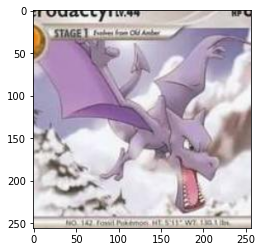

In [14]:
for (image, label) in test_dataset:
    print("Image shape", image.shape)
    print("Label shape", label.shape)
    print("-" * 100)
    print(label_encoder.inverse_transform([label]))
    plt.imshow(image)
    break

In [15]:
model = pc.create_model(RES)

In [16]:
model.summary()

Model: "Pokemon-classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 256, 256, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
re_lu_14 (ReLU)              (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32) 

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=EP,
steps_per_epoch=train_len // BS, validation_data=val_dataset, validation_steps=val_len // BS)


Epoch 1/20
 95/166 [================>.............] - ETA: 4s - loss: 4.7583 - accuracy: 0.0500

InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument:  Cannot batch tensors with different shapes in component 0. First element had shape [256,256,3] and element 6 had shape [256,256,1].
	 [[node IteratorGetNext (defined at <ipython-input-19-d611841b58a2>:6) ]]
  (1) Invalid argument:  Cannot batch tensors with different shapes in component 0. First element had shape [256,256,3] and element 6 had shape [256,256,1].
	 [[node IteratorGetNext (defined at <ipython-input-19-d611841b58a2>:6) ]]
	 [[IteratorGetNext/_7]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1302]

Function call stack:
train_function -> train_function


In [20]:
for batch in train_dataset:
   pass

InvalidArgumentError: Cannot batch tensors with different shapes in component 0. First element had shape [256,256,3] and element 13 had shape [256,256,1]. [Op:IteratorGetNext]